In [187]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file_path="C://project//Case Study 2 - Credit Card Case Study//"
file_name1="Credit Card Data.xlsx"
file_name2="Customer Acqusition.csv"
file_name3="Repayment.csv"
file_name4="spend.csv"

In [3]:
credit_card_data=pd.read_excel(file_path+file_name1)
credit_card_data

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed


In [4]:
Customer_Acqusition=pd.read_csv(file_path+file_name2)
Customer_Acqusition


,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [5]:
Repayment=pd.read_csv(file_path+file_name3)
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [6]:
spend=pd.read_csv(file_path+file_name4)
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [7]:
mean=Customer_Acqusition["Age"].mean()
Customer_Acqusition["Age"]=Customer_Acqusition["Age"].apply(lambda x :mean if x <18 else x)
Customer_Acqusition


,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [8]:
merged_df=pd.merge(spend,Customer_Acqusition,on="Customer",how="inner")
merged_df["customer spend"]=merged_df.apply(lambda x : x["Limit"]*0.5 if x["Amount"] > x["Limit"] else x["Amount"],axis=1)
merged_df

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,customer spend
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277,A7,3-May-06,AIR TICKET,305050.62,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,50000.50
1496,295,A7,23-Feb-05,CAMERA,314704.54,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,50000.50
1497,313,A7,12-Jan-04,AUTO,498358.28,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,50000.50
1498,331,A7,25-Jan-04,TRAIN TICKET,461282.47,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,50000.50


In [9]:
merge_df_repay=pd.merge(Repayment,Customer_Acqusition,on="Customer",how="inner")
merge_df_repay["customer repayment"]=merge_df_repay.apply(lambda x:x["Limit"] if x["Amount"]>x["Limit"] else x["Amount"],axis=1)
merge_df_repay

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment,customer repayment
0,NaN,A1,12-Jan-04,495414.75,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,495414.75
1,2.0,A1,3-Jan-04,245899.02,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,245899.02
2,3.0,A1,15-Jan-04,259490.06,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,259490.06
3,4.0,A1,25-Jan-04,437555.12,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,437555.12
4,5.0,A1,17-Jan-05,165972.88,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,22-Nov-05,55108.71,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,55108.71
1496,295.0,A7,3-Dec-05,429700.12,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,100001.00
1497,313.0,A7,23-Feb-05,344628.72,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,100001.00
1498,331.0,A7,31-Mar-06,336264.37,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,100001.00


In [10]:
distinct_cust=merged_df["Customer"].nunique()
print("Number of distinct customers:",distinct_cust)

Number of distinct customers: 100


In [11]:
distinct_category=merged_df["Type"].nunique()
print("Number of distinct category:",distinct_category)

Number of distinct category: 15


In [12]:
average_month=spend.groupby("Customer")["Amount"].mean().round(2)
sort=average_month.sort_index(ascending=True).reset_index(name="avg month spend")
print("Average monthly spend by Customer")
sort


Average monthly spend by Customer


,Customer,avg month spend
0,A1,285705.71
1,A10,213745.81
2,A100,224786.88
3,A11,250957.09
4,A12,263969.38
...,...,...
95,A95,240401.50
96,A96,54729.66
97,A97,139018.26
98,A98,284521.06


In [13]:
average_month_repay=Repayment.groupby("Customer")["Amount"].mean().round(2)
average_month_repay=average_month_repay.sort_index(ascending=True).reset_index(name="avg month repayment")
print("Average monthly repayments by Customer")
average_month_repay


Average monthly repayments by Customer


,Customer,avg month repayment
0,A1,264093.98
1,A10,205313.75
2,A100,69551.19
3,A11,295051.89
4,A12,268863.23
...,...,...
95,A95,369405.96
96,A96,310992.30
97,A97,121874.90
98,A98,337815.57


In [14]:
merge_df_spend_repay1=pd.merge(Repayment,spend,on="Customer",how="inner")
merge_df_spend_repay1["Monthly Profit"]=merge_df_spend_repay1["Amount_x"]-merge_df_spend_repay1["Amount_y"]
merge_df_spend_repay1["Interest Earned"]=merge_df_spend_repay1["Monthly Profit"].apply(lambda x : x*0.029 if x>0 else 0).round(2)
merge_df_spend_repay1

,SL No:,Customer,Month_x,Amount_x,Unnamed: 4,Sl No:,Month_y,Type,Amount_y,Monthly Profit,Interest Earned
0,NaN,A1,12-Jan-04,495414.75,NaN,1,12-Jan-04,JEWELLERY,485470.80,9943.95,288.37
1,NaN,A1,12-Jan-04,495414.75,NaN,2,3-Jan-04,PETRO,410556.13,84858.62,2460.90
2,NaN,A1,12-Jan-04,495414.75,NaN,3,15-Jan-04,CLOTHES,23740.46,471674.29,13678.55
3,NaN,A1,12-Jan-04,495414.75,NaN,4,25-Jan-04,FOOD,484342.47,11072.28,321.10
4,NaN,A1,12-Jan-04,495414.75,NaN,5,17-Jan-05,CAMERA,369694.07,125720.68,3645.90
...,...,...,...,...,...,...,...,...,...,...,...
37279,349.0,A7,3-Jan-04,473662.61,NaN,277,3-May-06,AIR TICKET,305050.62,168611.99,4889.75
37280,349.0,A7,3-Jan-04,473662.61,NaN,295,23-Feb-05,CAMERA,314704.54,158958.07,4609.78
37281,349.0,A7,3-Jan-04,473662.61,NaN,313,12-Jan-04,AUTO,498358.28,-24695.67,0.00
37282,349.0,A7,3-Jan-04,473662.61,NaN,331,25-Jan-04,TRAIN TICKET,461282.47,12380.14,359.02


In [15]:
top5prod=spend.groupby("Type")["Amount"].sum()
top5prod=top5prod.sort_values(ascending=False)
top5prod=top5prod.nlargest(5).reset_index(name="Total Amount")
print("the top 5 product types")
print(top5prod["Type"])


the top 5 product types
0           PETRO
1          CAMERA
2            FOOD
3    TRAIN TICKET
4      AIR TICKET
Name: Type, dtype: object


In [16]:
merge_df_maximum=pd.merge(Customer_Acqusition,spend,on="Customer",how="inner")
merge_df_maximum=merge_df_maximum.groupby("City")["Amount"].sum()
merge_df_maximum=merge_df_maximum.idxmax()
print("city is having maximum spend:",merge_df_maximum)

city is having maximum spend: COCHIN


In [17]:
merge_df_age=pd.merge(Customer_Acqusition,spend,on="Customer",how="inner")
merge_df_age=merge_df_age.groupby("Age")["Amount"].sum()
merge_df_age=merge_df_age.idxmax()
print("age group is spending more money:",merge_df_age)



age group is spending more money: 28.0


In [18]:
top10repayment=Repayment.groupby("Customer")["Amount"].sum()
top10repayment=top10repayment.nlargest(10).reset_index(name="Total Amount")
print("top 10 customers in terms of repayment")
top10repayment["Customer"]

top 10 customers in terms of repayment


0    A61
1    A60
2    A13
3    A22
4    A21
5    A43
6    A45
7    A12
8    A48
9    A14
Name: Customer, dtype: object

In [150]:
merge_df_spend_customer=pd.merge(spend,Customer_Acqusition,on="Customer",how="inner")
merge_df_spend_customer["Month"]=pd.to_datetime(merge_df_spend_customer["Month"])
merge_df_spend_customer["Year"]=merge_df_spend_customer["Month"].dt.year
pivot_table1=merge_df_spend_customer.pivot_table(values="Amount",index="City",columns=["Year","Product"],aggfunc="sum")
pivot_table1


C:\Users\aazar\AppData\Local\Temp\ipykernel_25720\3278464855.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df_spend_customer["Month"]=pd.to_datetime(merge_df_spend_customer["Month"])


Year              2004                                 2005               \
Product           Gold    Platimum      Silver         Gold     Platimum   
City                                                                       
BANGALORE   9289878.54  6046763.93  6773901.65  12892362.99   7784194.68   
BOMBAY      6987853.53  5199581.00  3061805.08   8983018.28   5134074.48   
CALCUTTA    7477140.98  5961165.93  3321963.10  10303355.80   8810284.03   
CHENNAI     1059618.50  5558572.68  1156129.37   3740945.58   8868435.43   
COCHIN      7315850.15  8472832.23  4587738.70  12110613.03  10856722.82   
DELHI       2806495.00  1565199.90  4293224.28   1964845.27   2068490.16   
PATNA       2072567.90  1113069.60  3398795.65   3252615.77   2883231.07   
TRIVANDRUM  2415102.84  3761433.87   795897.19   1240375.85   7186762.35   

Year                           2006                           
Product         Silver         Gold     Platimum      Silver  
City                                                          
BANGALORE   3936068.22  12030611.09   5620904.86  4967945.66  
BOMBAY      2368375.97   7917144.31   7547549.72  3628864.37  
CALCUTTA    1285609.11  11167532.77  11305526.03  4783182.26  
CHENNAI     1000540.48   2704288.62   6921130.79  1665326.62  
COCHIN      2619231.25  10499142.38  12453968.83  4579249.87  
DELHI       2515127.59   2957103.32    764247.73  4581831.29  
PATNA       5244763.90   2276181.69   1256137.65  3111911.31  
TRIVANDRUM  1445540.63   2735710.87   4174473.45  2005942.36

<Figure size 1200x600 with 0 Axes>

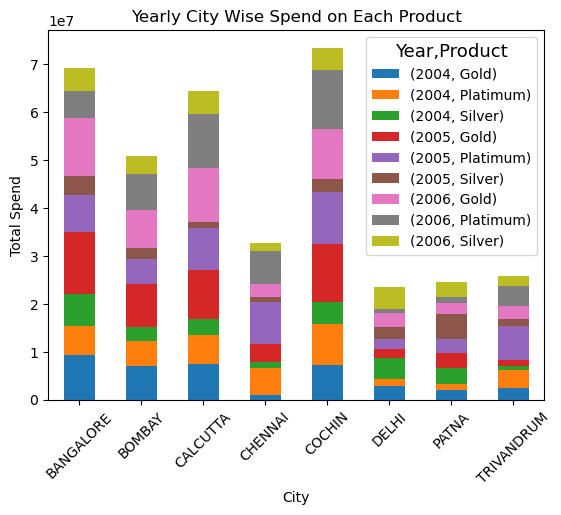

In [163]:

plt.figure(figsize=(12,6))
pivot_table1.plot(kind='bar', stacked=True)
plt.title("Yearly City Wise Spend on Each Product")
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.legend(title='Year,Product', title_fontsize='13', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [127]:
merge_df_spend_city=pd.merge(spend,Customer_Acqusition,on="Customer",how="inner")
merge_df_spend_city["Month"]=pd.to_datetime(merge_df_spend_city["Month"])
merge_df_spend_city["month"]=merge_df_spend_city["Month"].dt.month

pivot=pd.pivot_table(merge_df_spend_city,values="Amount",index="City",columns="month",aggfunc="sum")
col={1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"ACT",11:"NOV",12:"DEC"}
pivot=pivot.rename(columns=col)
pivot.transpose()

C:\Users\aazar\AppData\Local\Temp\ipykernel_25720\2501838457.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df_spend_city["Month"]=pd.to_datetime(merge_df_spend_city["Month"])


City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
month,,,,,,,,
JAN,17782487.66,10681854.60,14163384.38,7649568.68,18692606.60,7373794.37,7388720.78,5688758.54
FEB,9875860.87,7813534.61,11449586.70,5866408.35,9459367.08,3072043.85,3466726.76,4459329.30
MAR,10765773.46,9857699.82,10076115.86,4413870.52,10733411.24,3386628.30,3795753.30,3855833.54
APR,6182081.72,3726382.34,6883832.96,3231144.38,7070107.83,2845176.75,2786278.83,2775772.32
MAY,10743668.90,6974931.87,7868030.30,4422623.36,9912248.75,2638193.66,3476601.00,4631877.09
JUN,1382739.41,1486412.18,2693423.54,1903803.90,2738031.53,828262.78,1653183.92,828576.89
JUL,3737413.09,612457.59,2323261.43,1186667.37,1758023.02,488399.04,191003.23,960551.29
AUG,1552898.45,1066744.75,2179294.85,681577.16,2582997.08,475893.81,813559.15,561400.55
SEP,1306412.01,1835082.87,2208767.98,1591669.63,1739644.69,245802.04,70329.95,215826.30


<Figure size 1200x600 with 0 Axes>

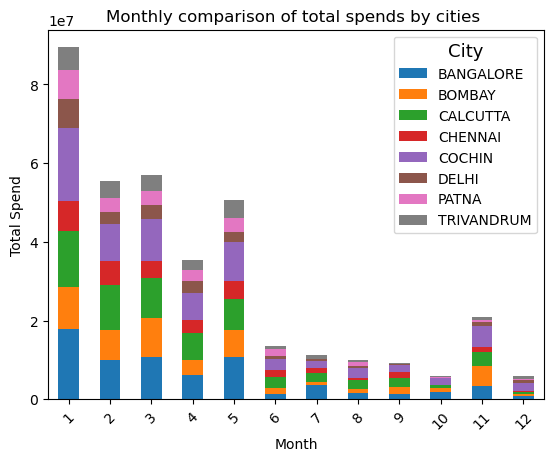

In [138]:

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title("Monthly comparison of total spends by cities ")
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend(title='City', title_fontsize='13', loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [ ]:
merge_df_spend_customer=merge_df_spend_customer.groupby(["City","Product","Year"])["Amount"].sum()
merge_df_spend_customer=merge_df_spend_customer.reset_index(name="Total Amount")


In [178]:
yearly_spend=spend
yearly_spend["Month"]=pd.to_datetime(yearly_spend["Month"])
yearly_spend["year"]=yearly_spend["Month"].dt.year
yearly_spend=yearly_spend[(yearly_spend["Type"]=="AIR TICKET")]
pivot_table2=yearly_spend.pivot_table(values="Amount",index="year",columns="Type",aggfunc="sum")
pivot_table2

Type,AIR TICKET
year,
2004,8370914.59
2005,14495718.73
2006,10088812.10


(array([0, 1, 2]),
 [Text(0, 0, '2004'), Text(1, 0, '2005'), Text(2, 0, '2006')])

<Figure size 600x600 with 0 Axes>

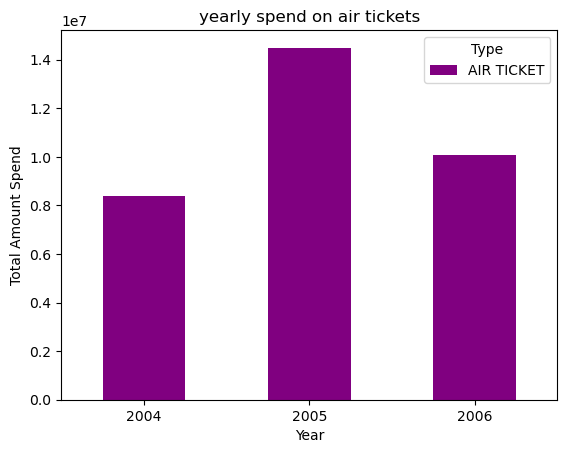

In [192]:
plt.figure(figsize=(6,6))
pivot_table2.plot(kind="bar",stacked=True,color="purple")
plt.title("yearly spend on air tickets")
plt.xlabel("Year")
plt.ylabel("Total Amount Spend")
plt.xticks(rotation=0)


In [205]:
monthly_spend=pd.merge(spend,Customer_Acqusition,on="Customer",how="inner")
monthly_spend["Month"]=pd.to_datetime(monthly_spend["Month"])
monthly_spend["month"]=monthly_spend["Month"].dt.month
pivot_table3=monthly_spend.pivot_table(values="Amount",index="Product",columns="month",aggfunc="sum")
col={1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"ACT",11:"NOV",12:"DEC"}
pivot_table3=pivot_table3.rename(columns=col)
pivot_table3



month,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,ACT,NOV,DEC
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,35212526.96,22081411.74,22639437.70,12798498.34,19380600.97,4756418.62,3695098.37,3892605.15,3411278.13,2517051.91,7977852.48,2951972.85
Silver,21794816.82,8602266.23,14988675.86,9531706.20,9739404.20,2219152.89,2395261.32,1067730.23,1985369.72,494594.37,3743265.31,566722.76


(array([0, 1, 2]),
 [Text(0, 0, 'Gold'), Text(1, 0, 'Platimum'), Text(2, 0, 'Silver')])

<Figure size 600x300 with 0 Axes>

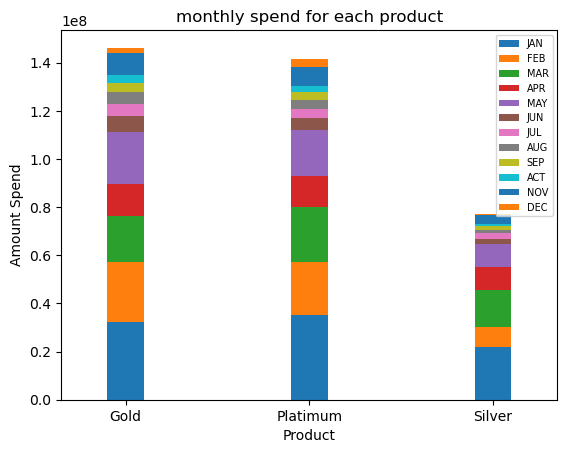

In [225]:
plt.figure(figsize=(6,3))
pivot_table3.plot(kind="bar",stacked=True,width=0.2)
plt.title("monthly spend for each product")
plt.xlabel("Product")
plt.ylabel("Amount Spend")
plt.legend(loc="upper right",fontsize=7)
plt.xticks(rotation=0)


In [351]:

repayment_df=pd.merge(Repayment,Customer_Acqusition,on="Customer",how="inner")
repayment_df["Month"]=pd.to_datetime(repayment_df["Month"])
repayment_df

def top10(repayment_df,product,time_period):
    repayment_df=repayment_df[repayment_df["Product"]==product]
    if time_period=="yearly":
        repayment_df["Time period"]=repayment_df["Month"].dt.year
    elif time_period=="monthly":
        repayment_df["Time period"]=repayment_df["Month"].dt.month
    result_df=repayment_df.groupby(["City","Customer","Time period"]).agg({"Amount":"sum"}).nlargest(10,"Amount")
    return result_df

result=top10(repayment_df,product="Gold",time_period="yearly").reset_index()
result

C:\Users\aazar\AppData\Local\Temp\ipykernel_25720\3428395093.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repayment_df["Time period"]=repayment_df["Month"].dt.year


,City,Customer,Time period,Amount
0,COCHIN,A61,2005,4276860.55
1,DELHI,A44,2005,4165317.77
2,COCHIN,A45,2005,4042447.57
3,BANGALORE,A43,2005,4006956.60
4,BANGALORE,A13,2005,3757673.00
5,COCHIN,A61,2006,3744127.41
6,CALCUTTA,A60,2005,3742856.10
7,BANGALORE,A13,2006,3477314.89
8,CALCUTTA,A29,2006,3434298.00
9,TRIVANDRUM,A28,2006,3376614.65
